<a href="https://colab.research.google.com/github/padmins/Rep_First/blob/master/Tabular_Playground_October_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### Download Kaggle data to colab

In [ ]:
! kaggle competitions download tabular-playground-series-oct-2021

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


### Unzip Train , test and sample_submission file

In [ ]:
! unzip train.csv.zip
! unzip test.csv.zip
! unzip sample_submission.csv.zip



Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: train.csv               
yes

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
Archive:  sample_submission.csv.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


Import the necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('train.csv')
train_df.head()

NameError: ignored

In [ ]:
train_df.shape

(1000000, 287)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 287 entries, id to target
dtypes: float64(240), int64(47)
memory usage: 2.1 GB


In [ ]:
all_data = train_df.drop(columns=['target','id'],axis=1)
all_data.shape

(1000000, 285)

In [ ]:
all_target = train_df['target']

## Check the distribution of Target values

In [ ]:
all_target.value_counts()

1    500485
0    499515
Name: target, dtype: int64

In [ ]:
data_used = all_data[:1000000]
labels_used= all_target[:1000000]

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
train_data, valid_data, train_labels, valid_labels = train_test_split(data_used,labels_used,test_size=0.1)

In [ ]:
train_data.shape, valid_data.shape, train_labels.shape, valid_labels.shape

((900000, 285), (100000, 285), (900000,), (100000,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators =50, max_leaf_nodes=16,random_state=42, max_features=5)
rnd_clf.fit(train_data,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
val_preds = rnd_clf.predict_proba(valid_data)

In [ ]:
val_preds1 = rnd_clf.predict(valid_data)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score
#confusion_matrix(valid_labels,val_preds1)

Prediction of probabilities for ROC_AUC_Score

In [ ]:
act_preds = val_preds[:,1] 

In [ ]:
print(accuracy_score(valid_labels,val_preds1))
print(roc_auc_score(valid_labels,act_preds))

0.7581875
0.836055845281413


## Finding the top 10 important features

In [ ]:
important_features_dict = {}
for idx, val in enumerate(rnd_clf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'10 most important features: {important_features_list[:235]}')

10 most important features: [22, 179, 69, 78, 156, 214, 136, 58, 200, 3, 1, 92, 12, 8, 112, 201, 19, 43, 77, 134, 18, 266, 247, 56, 119, 243, 192, 72, 82, 90, 139, 162, 211, 95, 150, 258, 48, 103, 99, 241, 63, 138, 195, 75, 52, 5, 4, 7, 127, 17, 213, 53, 13, 199, 65, 125, 14, 108, 33, 96, 173, 73, 114, 107, 26, 143, 252, 93, 71, 269, 6, 227, 20, 40, 245, 83, 98, 141, 29, 169, 55, 217, 184, 159, 198, 181, 130, 101, 27, 85, 265, 231, 116, 117, 203, 224, 154, 86, 239, 187, 206, 218, 74, 256, 44, 11, 131, 2, 222, 174, 193, 35, 219, 188, 170, 164, 84, 152, 196, 16, 31, 23, 89, 161, 208, 28, 42, 79, 0, 9, 10, 15, 21, 24, 25, 30, 32, 34, 36, 37, 38, 39, 41, 45, 46, 47, 49, 50, 51, 54, 57, 59, 60, 61, 62, 64, 66, 67, 68, 70, 76, 80, 81, 87, 88, 91, 94, 97, 100, 102, 104, 105, 106, 109, 110, 111, 113, 115, 118, 120, 121, 122, 123, 124, 126, 128, 129, 132, 133, 135, 137, 140, 142, 144, 145, 146, 147, 148, 149, 151, 153, 155, 157, 158, 160, 163, 165, 166, 167, 168, 171, 172, 175, 176, 177, 178, 1

## Function to plot top 20 important features

In [ ]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'][:50], y=fi_df['feature_names'][:50])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


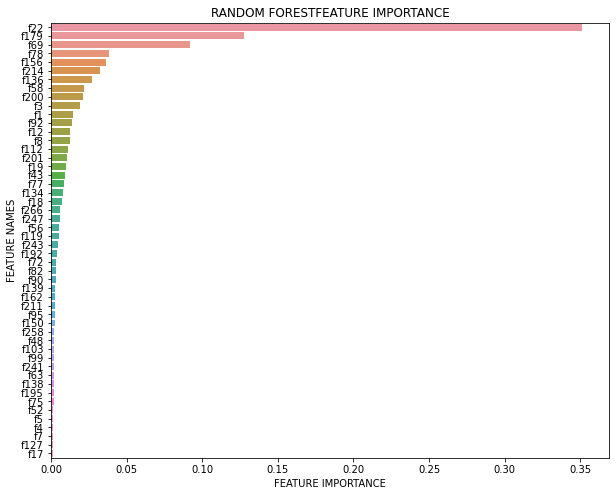

In [ ]:
plot_feature_importance(rnd_clf.feature_importances_,all_data.columns,'RANDOM FOREST')

In [ ]:
imp_features = ['f22','f179','f69','f58','f214','f136','f78','f156','f3','f77','f8','f92','f12','f43','f200','f247','f211','f112','f18','f134','f19']

In [ ]:
imp_features_50 =  [22, 179, 69, 78, 156, 214, 136, 58, 200, 3, 1, 92, 12, 8, 112, 201, 19, 43, 77, 134, 18, 266, 247, 56, 119, 243, 192, 72, 82, 90, 139, 162, 211, 95, 150, 258, 48, 103, 99, 241, 63, 138, 195, 75, 52, 5, 4, 7, 127, 17, 213, 53, 13, 199, 65, 125, 14, 108, 33, 96, 173, 73, 114, 107, 26, 143, 252, 93, 71, 269, 6, 227, 20, 40, 245, 83, 98, 141, 29, 169, 55, 217, 184, 159, 198, 181, 130, 101, 27, 85, 265, 231, 116, 117, 203, 224, 154, 86, 239, 187, 206, 218, 74, 256, 44, 11, 131, 2, 222, 174, 193, 35, 219, 188, 170, 164, 84, 152, 196, 16, 31, 23, 89, 161, 208, 28, 42, 79, 0, 9, 10, 15, 21, 24, 25, 30, 32, 34, 36, 37, 38, 39, 41, 45, 46, 47, 49, 50, 51, 54, 57, 59, 60, 61, 62, 64, 66, 67, 68, 70, 76, 80, 81, 87, 88, 91, 94, 97, 100, 102, 104, 105, 106, 109, 110, 111, 113, 115, 118, 120, 121, 122, 123, 124, 126, 128, 129, 132, 133, 135, 137, 140, 142, 144, 145, 146, 147, 148, 149, 151, 153, 155, 157, 158, 160, 163, 165, 166, 167, 168, 171, 172, 175, 176, 177, 178, 180, 182, 183, 185, 186, 189, 190, 191, 194, 197, 202, 204, 205, 207, 209, 210, 212, 215, 216]


In [ ]:
features_50 = ['f' + str(d) for d in imp_features_50]
len(features_50)

235

### Considering only top 20 features for our training and evaluation

In [ ]:
train_data_new = train_data[features_50]
valid_data_new = valid_data[features_50]

In [ ]:
import random
random.seed = 42

### Try Logistic Regression Model with only important features and 0.8 million of data

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_new = LogisticRegression(solver='saga', penalty='l1', max_iter=50, random_state=42, C=0.001)
lr_new.fit(train_data_new,train_labels)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
val_preds = lr_new.predict_proba(valid_data_new)[:,1]

### keeping LR as our base model, compute roc_auc_score

In [ ]:
print(roc_auc_score(valid_labels,val_preds))

0.8275155271878747


Predicting Random Forest Classifier ROC_AUC_Score using only important features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf1 = RandomForestClassifier(n_estimators =120, max_leaf_nodes=16,random_state=42, max_features=5)
rnd_clf1.fit(train_data_new,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_preds1 = rnd_clf1.predict_proba(valid_data_new)[:,1]
print(roc_auc_score(valid_labels,y_preds1))

0.8394023918651177


### Trying DNN using Tensorflow - consider only Top 21 important features

In [ ]:
import tensorflow as tf

from tensorflow import keras


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16,activation='selu', input_shape=(21,)))
model.add(tf.keras.layers.Dense(32,activation='selu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32,activation='selu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(train_data_new,train_labels, batch_size=32, epochs=5,
          validation_data=(valid_data_new,valid_labels))


Epoch 1/5


ValueError: ignored

In [ ]:
valid_preds = tf.squeeze(model.predict(valid_data_new))
print(roc_auc_score(valid_labels,valid_preds))

## Trying with Gradient Boosting Decision Trees for classification

## you can observe that GBDT is slower as it is a sequentail process unlike Random forests

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100,
                                 min_samples_leaf=16,
                                 random_state=42,
                                 max_depth=5,
                                 learning_rate=0.1
                                 )
gbc.fit(train_data_new,train_labels)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=16, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_predictions=gbc.predict_proba(valid_data_new)[:,1]
print(roc_auc_score(valid_labels,y_predictions))

0.8411877075430856


In [ ]:
50,5,0.01 -> 0.8275602030555536
50,5,0.1, 32 -> 0.8371356121328695
50,5,1 -> 0.8304029061517143
50,5,0.3 -> 0.8365210774918708
50,7,0.1 -> 0.8369981705918417
100,5,0.2 -> 0.8369681624513573
50,9,0.1 -> 0.8360158545612544
50,5,0.1, 16 -> 0.8371562687392817
50, 7, 0.15,16 -> 0.8369343944899855
100,5,0.1,16 -> 0.8376441555183308
100,7,0.08,16-> 0.8368162266327451


## We can try Gri search for best Parameter values using the below code

In [ ]:
parameters = {
    "n_estimators":[50,100],
    "max_depth":[3,5,7],
    "learning_rate":[0.01,0.1,0.3,1]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=3)
cv.fit(train_data_new,train_labels.values.ravel())

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

In [ ]:
### Read test data and take only important features for evaluation

In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
test_df_modified = test_df[features_50]

In [ ]:
submission_df = pd.read_csv('sample_submission.csv')

In [ ]:
y_preds_actual = gbc.predict_proba(test_df_modified)[:,1]

In [ ]:
submission = pd.DataFrame({'id':submission_df['id'],'target':y_preds_actual})

In [ ]:
y_preds_actual

array([0.73092465, 0.31536385, 0.89123483, ..., 0.50691906, 0.53214389,
       0.43690705])

In [ ]:
submission_df.head()

,id,target
0,1000000,0.5
1,1000001,0.5
2,1000002,0.5
3,1000003,0.5
4,1000004,0.5


In [ ]:
submission = pd.DataFrame({'id':submission_df['id'],'target':y_preds_actual})

In [ ]:
submission

,id,target
0,1000000,0.730925
1,1000001,0.315364
2,1000002,0.891235
3,1000003,0.832761
4,1000004,0.223503
...,...,...
499995,1499995,0.965956
499996,1499996,0.633360
499997,1499997,0.506919
499998,1499998,0.532144


In [ ]:
submission.to_csv('New_submission_18_oct.csv',index=False)

In [ ]:
!pip install catboost
!pip install ipywidgets

In [ ]:
from catboost import CatBoostClassifier, Pool, metrics, cv

In [ ]:
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent'
)

NameError: ignored

In [ ]:
model.fit(
    train_data_new, train_labels,
    #cat_features=categorical_features_indices,
    eval_set=(valid_data_new, valid_labels),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

In [ ]:
cv_params = model.get_params()
cv_params.update({
    'loss_function': metrics.Logloss()
})
cv_data = cv(
    Pool(train_data_new, train_labels),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))

Best validation accuracy score: 0.76±0.00 on step 394


In [ ]:
 valid_probs = model.predict_proba(valid_data)[:,1]

In [ ]:
print(roc_auc_score(valid_labels,valid_probs))

In [ ]:
#predictions = model.predict(X_test)
predictions_probs = model.predict_proba(test_df_modified)[:,1]
#print(predictions[:10])
print(predictions_probs[:10])

[0.79449853 0.25392779 0.89687538 0.80014578 0.27324098 0.23498354
 0.02518438 0.35357181 0.97083053 0.85073325]


In [ ]:
submission = pd.DataFrame({'id':submission_df['id'],'target':predictions_probs})

In [ ]:
submission.to_csv('Catboost_Morning_200_features_20_oct.csv',index=False)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components =0.98)

In [ ]:
X_reduced = pca.fit(train_data)